In [307]:
import warnings
warnings.filterwarnings('ignore')

# Importing Required Libraries and Understanding data

In [308]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [309]:
# importing data set
digits = pd.read_csv("train.csv")

In [310]:
# understanding dataset
digits.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [311]:
digits.shape

(42000, 785)

In [312]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [313]:
## So we can observe that all the columns of the dataset are integer type and no issues in datatypes of columns.

In [314]:
digits.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [315]:
## checking for total missing values in columns of dataset
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [316]:
## checking for total null values in each row of dataset
digits.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41970    0
41971    0
41972    0
41973    0
41974    0
41975    0
41976    0
41977    0
41978    0
41979    0
41980    0
41981    0
41982    0
41983    0
41984    0
41985    0
41986    0
41987    0
41988    0
41989    0
41990    0
41991    0
41992    0
41993    0
41994    0
41995    0
41996    0
41997    0
41998    0
41999    0
Length: 42000, dtype: int64

## cross-checking if any null or missing values exist in dataset

In [317]:
sum(digits.isnull().any())

0

In [318]:
sum(digits.isnull().any(axis=1))

0

In [319]:
## from above we can confirm that there is no missing values in the dataset as the value we got is zero tells that there are no
## missing values in each column and row of dataset

## checking for duplicated rows

In [320]:
digits.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
41970    False
41971    False
41972    False
41973    False
41974    False
41975    False
41976    False
41977    False
41978    False
41979    False
41980    False
41981    False
41982    False
41983    False
41984    False
41985    False
41986    False
41987    False
41988    False
41989    False
41990    False
41991    False
41992    False
41993    False
41994    False
41995    False
41996    False
41997    False
41998    False
41999    False
Length: 42000, dtype: bool

In [321]:
sum(digits.duplicated())

0

In [322]:
## so we can say there are no duplicate records as sum is ZERO because if there are aqny duplicate rows, value will be >0

In [323]:
digits_order = list(np.sort(digits['label'].unique()))
print(digits_order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [324]:
digits.groupby('label').mean()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [325]:
## Basic PLots to check how feature variables are behaving with the digits i.e. our labels.

In [326]:
# excluding label variable 

digits1=digits[digits.columns]
digits1=digits1.drop('label',axis=1)

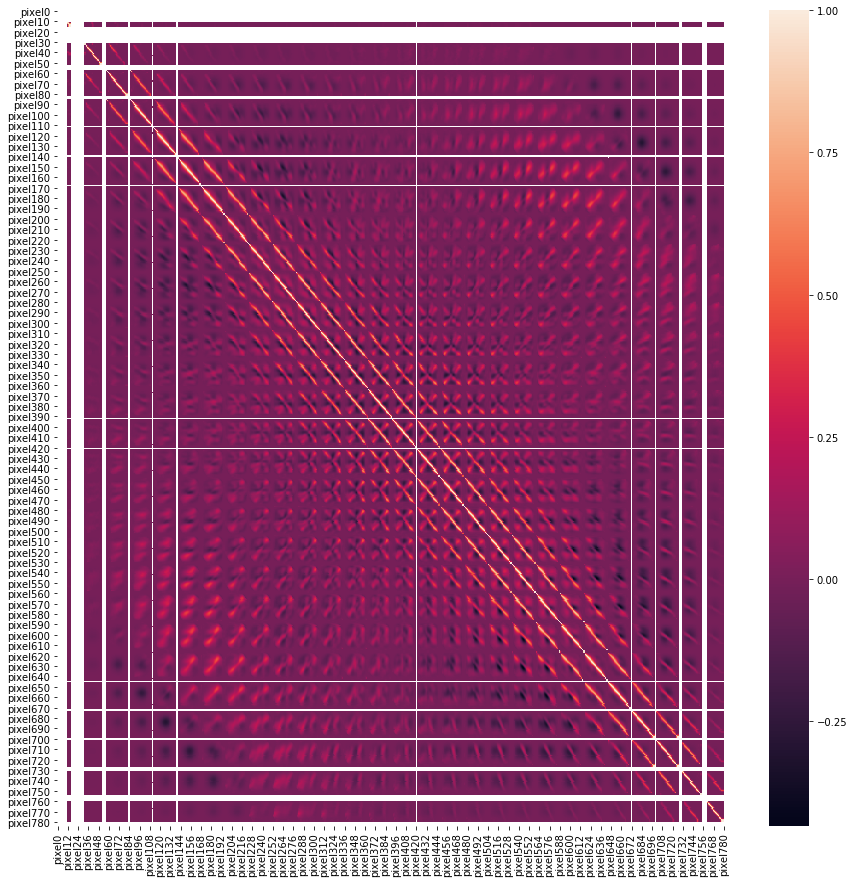

In [327]:
plt.figure(figsize=(15,15))
sns.heatmap(digits1.corr())
plt.show()

In [328]:
## not able to get much info. from the heatmap as there are many variables

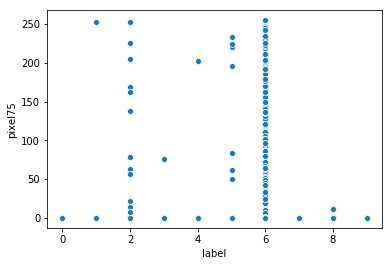

In [329]:
sns.scatterplot(x=digits['label'],y=digits['pixel75'])

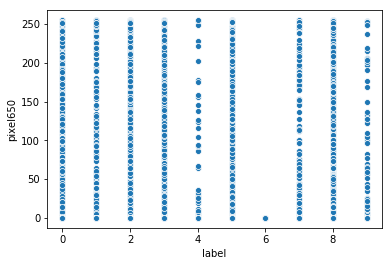

In [330]:
sns.scatterplot(x=digits['label'],y=digits['pixel650'])

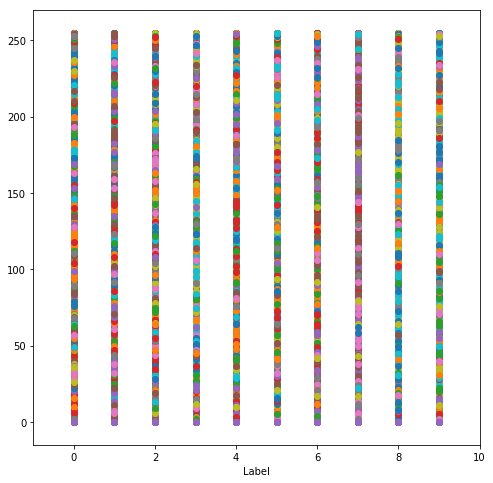

In [331]:
plt.figure(figsize=(8,8))
plt.xlim(-1,10)
plt.xlabel("Label")
for col in digits.columns:
    plt.scatter(digits['label'],digits[col])

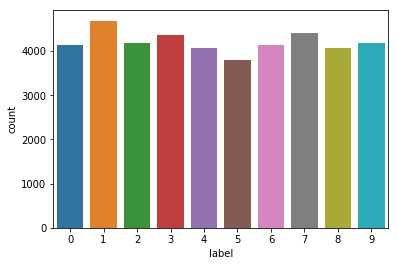

In [332]:
# count of each label i.e digit in dataset
sns.countplot(digits['label'])

In [333]:
## so we can observe all the labels are around same count, uniform distribution of 0-9 labels in dataset. 

In [334]:
# splitting into X and y
X = digits.drop("label", axis = 1)
y = digits['label']

In [335]:
# scaling the features
X_scale = scale(X)


In [336]:
## I am considering 20% of the dataset as the training data and remaining as test data to validate my model accuracy which was 
## built using sub-sample data,and finally for kaggle submission will use test.csv file to test accuracy of my model.

In [337]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, train_size=0.2,test_size = 0.8, random_state = 101)

In [338]:
X_train.shape

(8400, 784)

In [339]:
X_test.shape

(33600, 784)

In [340]:
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [341]:
# converting into DataFrame
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
print(type(X_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


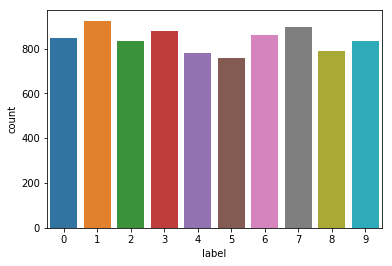

In [342]:
sns.countplot(y_train)

In [343]:
## so from above we can say that all the labels are well distributed,i.e uniformly distributed so we can proceed

## Model Building

will build basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [344]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [345]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_test,y_pred), "\n")

accuracy: 0.913125 



In [346]:
# non-linear model
# using poly kernel,C=1,with default values of hyperparamters(c,gamma)

# model
poly_model = SVC(kernel='poly')

# fit
poly_model.fit(X_train, y_train)

# predict
y_pred_poly = non_linear_model.predict(X_test)

In [347]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_test,y_pred_poly), "\n")

accuracy: 0.9396428571428571 



In [348]:
# non-linear model
# using rbf kernel,C=1,with default values of hyperparamters(c,gamma)

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred_non = non_linear_model.predict(X_test)

In [349]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_test, y_pred_non), "\n")

accuracy: 0.9396428571428571 



In [266]:
## so we can see from above basic 3 models, non-linear model(rbf) perform slightly better than linear model with default values
## of hyperparameters,so rbf can perform even better if we tune the hyperparameters(C and gamma) and select optimal hyperparametrs
## to get optimal model and increase accuracy.

# As non-linear model performing better than linear model, we can confirm that there is non-linearity in data exists
# i.e. This suggests that the problem and the data is inherently non-linear in nature

## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. Using 5-fold cross validation.

In [350]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# range of hyperparameters
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 41.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [351]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,187.942790,4.403855,23.230085,0.619458,1,0.01,"{'C': 1, 'gamma': 0.01}",0.752381,0.750595,0.747024,...,0.741310,0.010784,12,1.000000,0.999851,0.999851,1.000000,1.000000,0.999940,0.000073
1,45.181144,0.280916,12.770717,0.252072,1,0.001,"{'C': 1, 'gamma': 0.001}",0.935119,0.926786,0.935119,...,0.930833,0.004216,4,0.972321,0.971429,0.971429,0.972173,0.973214,0.972113,0.000663
2,68.478685,2.886335,17.643713,1.012954,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.905952,0.907738,...,0.903095,0.006075,8,0.916518,0.917708,0.916518,0.921577,0.919940,0.918452,0.002001
3,198.431972,2.897373,24.436482,1.336198,10,0.01,"{'C': 10, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,39.861094,1.366675,11.542134,1.104630,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941071,0.938690,0.945833,...,0.939405,0.003865,1,0.999405,0.999554,0.999405,0.999107,0.999256,0.999345,0.000152
5,30.287413,0.526666,10.805710,0.434139,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.933929,0.923214,0.931548,...,0.927262,0.004678,5,0.957887,0.959970,0.959375,0.957738,0.959077,0.958810,0.000865
6,202.055939,1.100994,24.531252,1.567116,100,0.01,"{'C': 100, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,40.369793,1.156402,11.828392,0.581422,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939881,0.936905,0.946429,...,0.939286,0.003783,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,23.483266,0.715061,8.868566,0.836305,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929762,0.923810,0.925595,...,0.925595,0.003409,6,0.994345,0.994494,0.994940,0.993006,0.994196,0.994196,0.000645
9,160.526944,3.281966,16.703510,0.123991,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


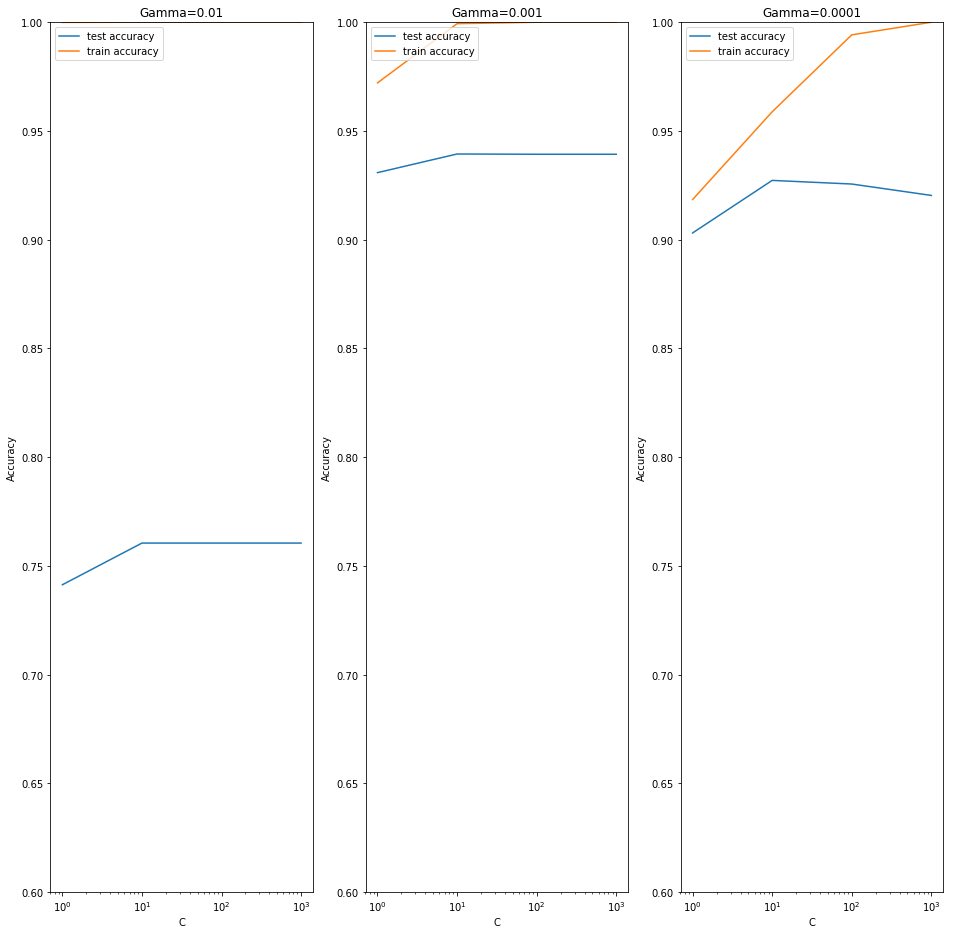

In [352]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,16))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [353]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The score is 0.9394047619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [354]:
# Building model with optimal hyperparameters c=10, gamma=0.001

model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred_final = model.predict(X_test)

In [355]:
# metrics
print(metrics.confusion_matrix(y_test, y_pred_final), "\n")

print("accuracy", round(metrics.accuracy_score(y_test, y_pred_final),2), "\n")

[[3211    0   19    2    2   12   26    3    8    2]
 [   0 3692   26    9    6    3    5    9    7    3]
 [  13   12 3165   29   29    6   20   40   21    8]
 [   4    5   77 3232    4   79    1   23   31   19]
 [   5    8   42    1 3117    5   20   19    9   64]
 [  15    8   33   61   15 2815   35   11   31   15]
 [  19    5   44    1   12   18 3167    1   10    0]
 [   5   17   52   12   29    4    1 3322    4   58]
 [   7   16   42   53   15   51   18   16 3044   10]
 [   9    9   33   20   81   10    0   94   21 3078]] 

accuracy 0.95 



In [356]:
## Just calculating the other metrics also.

# accuracy
print("accuracy", round(metrics.accuracy_score(y_test, y_pred_final),2), "\n")

# precision
print("precision", round(metrics.precision_score(y_test, y_pred_final,average='micro'),2),'\n')

# recall/sensitivity
print("recall", round(metrics.recall_score(y_test, y_pred_final,average='micro'),2),'\n')

accuracy 0.95 

precision 0.95 

recall 0.95 



#### So got an accuracy of 95% with the remaining data which has before splitted as test data and train data.

### so by using optimal hyperparameters, we got the accuracy of model improved from 93 to 95%.

#### Now i am using this model built with optimal hyperparameters and test the accuracy on test.CSV file given in Kaggle and submitting in .CSV format in KAGGLE platform to get the accuracy

In [357]:
# reading test file

test=pd.read_csv('test.csv')

In [358]:
test=scale(test)

In [359]:
y_pred_test=model.predict(test)

In [360]:
#checking shape of y_pred_test
y_pred_test.shape

(28000,)

In [361]:
## reading submission file

submission=pd.read_csv('sample_submission.csv')


In [362]:
submission['Label']=y_pred_test

In [363]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [364]:
## Exporting the predicted results into CSV file to submit it in Kaggle

In [365]:
submission.to_csv('submission.csv',index=False)

In [366]:
submission=pd.read_csv('submission.csv')

In [367]:
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


#### submitted to Kaggle and got the accuracy of 94.14% with test file given by Kaggle.

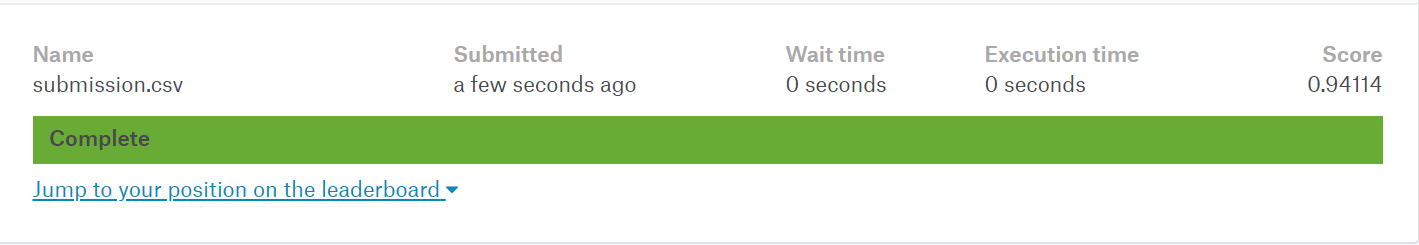

In [146]:
## just for extra work and for linear kernel, we will try to find optimal hyperparameters

In [147]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model1 = SVC(kernel="linear")

# set up GridSearchCV()
model_cv1 = GridSearchCV(estimator = model1, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [148]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.508988,2.226742,6.519704,0.694764,1,0.01,"{'C': 1, 'gamma': 0.01}",0.9125,0.9125,0.915476,...,0.911786,0.002699,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,15.988395,0.260822,6.231835,0.449186,1,0.001,"{'C': 1, 'gamma': 0.001}",0.9125,0.9125,0.915476,...,0.911786,0.002699,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,16.134766,0.408091,5.947554,0.083038,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.9125,0.9125,0.915476,...,0.911786,0.002699,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,16.403224,0.523884,5.956378,0.079412,10,0.01,"{'C': 10, 'gamma': 0.01}",0.9125,0.9125,0.915476,...,0.911786,0.002699,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,16.455827,0.456024,6.347952,0.367522,10,0.001,"{'C': 10, 'gamma': 0.001}",0.9125,0.9125,0.915476,...,0.911786,0.002699,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,16.931185,0.590709,6.085659,0.102343,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.9125,0.9125,0.915476,...,0.911786,0.002699,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,16.497203,0.425602,6.055795,0.084709,100,0.01,"{'C': 100, 'gamma': 0.01}",0.9125,0.9125,0.915476,...,0.911786,0.002699,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,16.742509,0.253395,6.220509,0.377396,100,0.001,"{'C': 100, 'gamma': 0.001}",0.9125,0.9125,0.915476,...,0.911786,0.002699,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,17.137233,0.533871,6.400540,0.457128,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.9125,0.9125,0.915476,...,0.911786,0.002699,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,16.797573,0.571712,6.547705,0.554961,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.9125,0.9125,0.915476,...,0.911786,0.002699,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


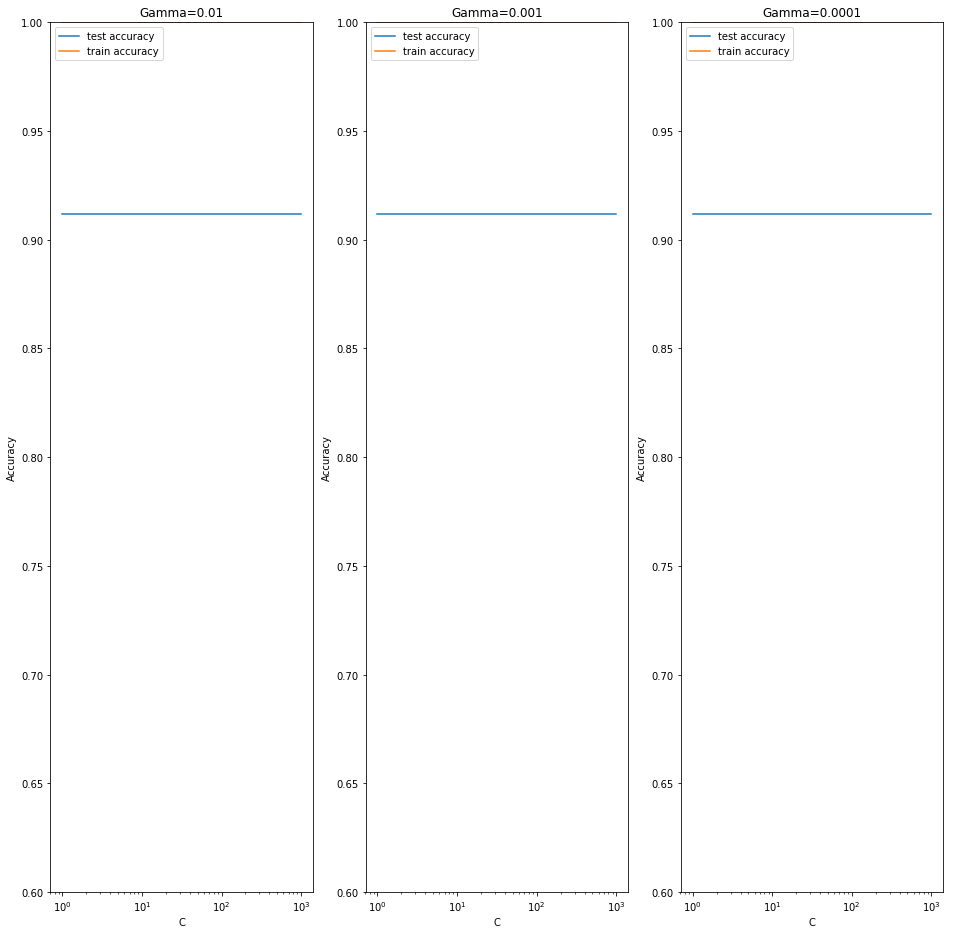

In [149]:
# converting C to numeric type for plotting on x-axis
cv_results1['param_C'] = cv_results1['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,16))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results1[cv_results1['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results1[cv_results1['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results1[cv_results1['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [150]:
# printing the optimal accuracy score and hyperparameters
best_score1 = model_cv1.best_score_
best_hyperparams1 = model_cv1.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9117857142857143 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


In [151]:
# model with optimal hyperparameters

# model
model1 = SVC(C=1, gamma=0.01, kernel="linear")

model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred1), "\n")
print(metrics.confusion_matrix(y_test, y_pred1), "\n")

accuracy 0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]] 



In [297]:
## so we can say that optimal hyperparamaters for linear model are the default parameters is c=1 and gamma=0.01, so no need to go 
## for k-fold and find optimal paramateers as for linear model, best C will be always equal=1